In [96]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.cluster import KMeans

# 데이터 로드
data = pd.read_csv('data/hos.csv')


In [58]:
data['Diagnosis'].value_counts()

Diagnosis
제2형 당뇨    321
고혈압       299
건강함       194
관상동맥질환    186
Name: count, dtype: int64

# Rule-Based Recommendation

In [82]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/hos.csv')

def recommend_for_diabetes(menu):
    filtered_menu = menu[(menu['당류(g)'] <= 3.3) & 
                         (menu['탄수화물(g)'] <= 13)&
                          (menu['나트륨(mg)'] <= 40)]
    return filtered_menu.sort_values(by=['당류(g)', '탄수화물(g)', '나트륨(mg)'])

def recommend_for_hypertension(menu):
    filtered_menu = menu[(menu['포화지방산(g)'] <= 1.4) & 
                          (menu['콜레스테롤(mg)'] <= 14) &
                          (menu['지방(g)'] <= 5) &
                          (menu['나트륨(mg)'] <= 40)]
    return filtered_menu.sort_values(by=['포화지방산(g)', '콜레스테롤(mg)', '지방(g)', '나트륨(mg)'])

def recommend_for_cad(menu):
    filtered_menu = menu[(menu['콜레스테롤(mg)'] <= 14) & 
                          (menu['포화지방산(g)'] <= 1.4)& 
                          (menu['나트륨(mg)'] <= 40)]
    return filtered_menu.sort_values(by=['콜레스테롤(mg)', '포화지방산(g)', '나트륨(mg)'])

def select_menu(menu_df):
    rice_menu = menu_df[menu_df['식품명'].str.contains('밥')]
    soup_menu = menu_df[menu_df['식품명'].str.contains('국')]

    # Check if rice_menu and soup_menu are not empty
    if not rice_menu.empty:
        rice_menu = rice_menu.sample(n=1)
    else:
        rice_menu = pd.DataFrame()  # Handle the case where there are no rice items
    
    if not soup_menu.empty:
        soup_menu = soup_menu.sample(n=1)
    else:
        soup_menu = pd.DataFrame()
    
    remaining_menu = menu_df[~menu_df['식품명'].str.contains('밥|국')]
    
    # Select 3 more random items from the remaining menu
    random_menu = remaining_menu.sample(n=3)
    
    # Combine the rice, soup, and random items
    final_menu = pd.concat([rice_menu, soup_menu, random_menu])
    
    # Shuffle the final menu to ensure randomness
    final_menu = final_menu.sample(frac=1).reset_index(drop=True)

    sum_columns = final_menu.drop('식품명', axis=1).sum()
    final_menu.loc[5] = sum_columns
    final_menu.at[5, '식품명'] = '합계'
    
    return final_menu

menu_data = pd.read_csv('data/menu.csv')

diabetes_recommendations = select_menu(recommend_for_diabetes(menu_data))
hypertension_recommendations = select_menu(recommend_for_hypertension(menu_data))
cad_recommendations = select_menu(recommend_for_cad(menu_data))

all_recommendations = {}
all_recommendations['diabetes_recommendations'] = diabetes_recommendations
all_recommendations['hypertension_recommendations'] = hypertension_recommendations
all_recommendations['cad_recommendations'] = cad_recommendations

In [83]:
all_recommendations

{'diabetes_recommendations':        식품명  에너지(kcal)  수분(g)  단백질(g)  지방(g)  탄수화물(g)  당류(g)  나트륨(mg)  칼륨(mg)  \
 0   미역국_새우       16.0   96.5    1.09   0.46     1.83    0.0      5.0    19.0   
 1  미음_칠분도미       20.0   95.0    0.30   0.10     4.60    0.0      0.0     4.0   
 2   쌀죽(흰죽)       52.0   87.0    1.33   0.15    11.43    0.0     29.0     9.0   
 3     옥돔구이       39.0   19.8    4.91   1.92     0.11    0.0     33.0     1.0   
 5       합계      127.0  298.3    7.63   2.63    17.97    0.0     67.0    33.0   
 
    칼슘(mg)  철(mg)  비타민 A(μg RAE)  비타민 C(mg)  비타민 D(μg)  포화지방산(g)  콜레스테롤(mg)  
 0     9.0   0.39            2.0       1.05       0.00      0.03      11.31  
 1     1.0   0.00            0.0       0.00       0.00      0.03       0.00  
 2     9.0   0.25            NaN       0.00       0.00      0.05       0.00  
 3     9.0   0.22            6.0       0.11       0.54      0.34      23.02  
 5    28.0   0.86            8.0       1.16       0.54      0.45      34.33  ,
 'hypertension_

# Model-Based Recommendation

In [ ]:
import pandas as pd

data = pd.read_csv('data/hos.csv')
df = data[data['Chronic_Diseases'] == '없음']

In [119]:
df['Age'] = pd.cut(df['Age'], bins=[0, 49, 64, 74, float('inf')], labels=[0, 1, 2, 3], right=True)

df['Gender'] = df['Gender'].map({'남성': 1, '여성': 2})

/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_2911/3270874598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.cut(df['Age'], bins=[0, 49, 64, 74, float('inf')], labels=[0, 1, 2, 3], right=True)
/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_2911/3270874598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map({'남성': 1, '여성': 2})


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 불필요한 열 제거 (예: ID)
df = df.drop(columns=['Patient_ID', 'Chronic_Diseases'])

# 연령 범주화
df['Age'] = pd.cut(df['Age'], bins=[0, 49, 64, 74, float('inf')], labels=[0, 1, 2, 3], right=True)
df['Gender'] = df['Gender'].map({'남성': 1, '여성': 2})

# 범주형 변수 인코딩 (예: 성별, 만성 질환, 진단명)
categorical_columns = ['Diagnosis', 'Medications']
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# 혈압 데이터 분리
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood_Pressure_mmHg'].str.split('/', expand=True).astype(float)
df = df.drop(columns=['Blood_Pressure_mmHg'])

# 범주형 컬럼의 결측치는 최빈값으로 채우기
for col in ['Diagnosis', 'Medications']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 수치형 컬럼의 결측치는 평균값으로 채우기
numeric_columns = df.select_dtypes(include=['float64', 'int']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# 수치형 데이터 정규화
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 데이터 준비
X = df.values

/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_2911/516295445.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_2911/516295445.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [121]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
from tensorflow.keras.optimizers import SGD
from sklearn.impute import SimpleImputer
import numpy as np

# NaN 값 처리 (평균값으로 채우기)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Autoencoder 모델 정의
input_dim = X_imputed.shape[1]
encoding_dim = 10  # 임베딩 차원 (조정 가능)
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Autoencoder 훈련
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_imputed, X_imputed, epochs=50, batch_size=32, shuffle=True)


Epoch 1/50


/Users/juran/Library/Python/3.9/lib/python/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [1]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 1.1252
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 1.1121
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 1.1000
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 1.0757
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 1.0809
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 1.0487
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 1.0634
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 1.0488
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 1.0229
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 1.0408
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.9776
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.9899
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.0045
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 0.9995
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.9561
Epoch 16/50
8/8 ━━━━━━━━━━━━━━

In [ ]:
# DEC 모델을 위한 초기 클러스터 중심 설정
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

# 임베딩 추출
encoder_model = Model(inputs=autoencoder.input, outputs=encoder)
X_encoded = encoder_model.predict(X_imputed)

# K-Means 클러스터링 초기화
n_clusters = 5  # 설정에 따라 변경 가능
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(X_encoded)


class ClusteringLayer(Layer):
    def __init__(self, n_clusters, **kwargs):
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters

    def build(self, input_shape):
        self.clusters = self.add_weight(shape=(self.n_clusters, input_shape[1]),
                                        initializer='glorot_uniform', name='clusters')

    def call(self, inputs):
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, 1) - self.clusters), axis=2)))
        q **= (self.n_clusters + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1))
        return q

# 클러스터링 레이어 추가
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder)
dec_model = Model(inputs=input_layer, outputs=[clustering_layer, autoencoder.output])

# DEC 모델 훈련
dec_model.compile(optimizer=SGD(0.01, 0.9), loss=['kld', 'mse'])
y_pred_last = np.copy(y_pred)

for epoch in range(100):
    q, _ = dec_model.predict(X_imputed, verbose=0)
    p = q ** 2 / q.sum(0)
    p = (p.T / p.sum(1)).T

    y_pred = q.argmax(1)
    if epoch % 10 == 0:
        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        print(f'...Epoch {epoch}, Change: {delta_label}')
    
    # 모델 훈련
    dec_model.fit(X_imputed, [p, X_imputed], epochs=1, batch_size=32, verbose=0)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
...Epoch 0, Change: 0.6104417443275452
...Epoch 10, Change: 0.1325301229953766
...Epoch 20, Change: 0.10843373835086823
...Epoch 30, Change: 0.0803212821483612
...Epoch 40, Change: 0.0803212821483612
...Epoch 50, Change: 0.0602409653365612
...Epoch 60, Change: 0.06827308982610703
...Epoch 70, Change: 0.024096384644508362
...Epoch 80, Change: 0.02811245061457157
...Epoch 90, Change: 0.00803212821483612


In [126]:
df['Cluster'] = y_pred

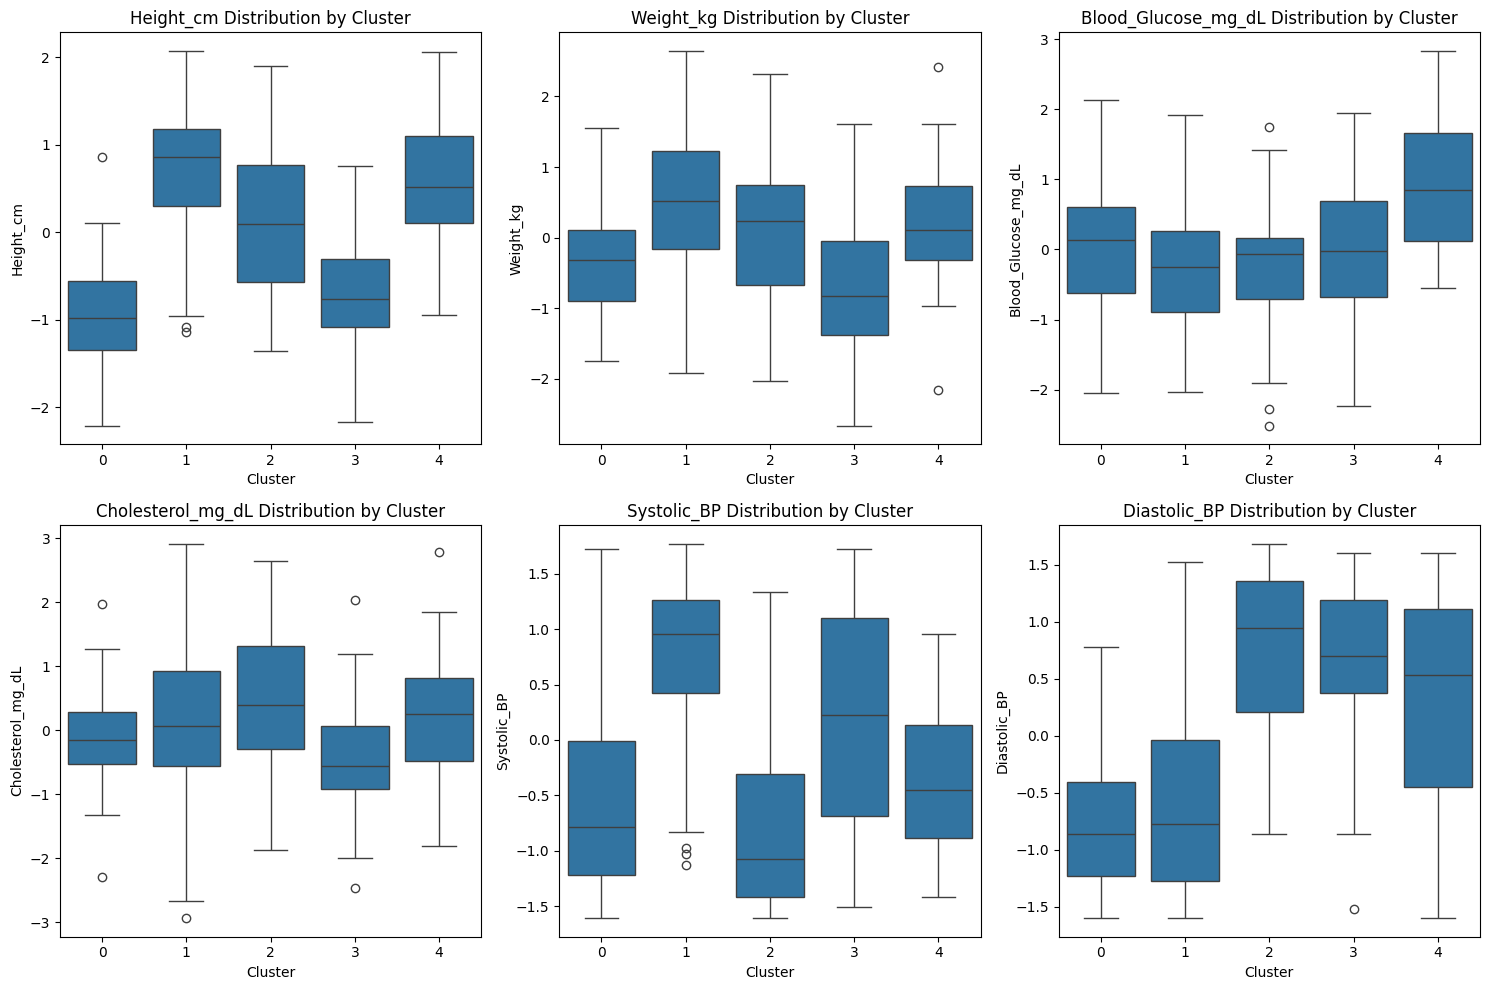

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# 주요 변수들에 대해 시각화

# 변수들 리스트
variables = ['Height_cm', 'Weight_kg', 'Blood_Glucose_mg_dL', 'Cholesterol_mg_dL', 
             'Systolic_BP', 'Diastolic_BP']

# 2x3 배열로 그래프 배치
plt.figure(figsize=(15, 10))

# 각 변수별로 시각화
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster', y=var, data=df)
    plt.title(f'{var} Distribution by Cluster')

plt.tight_layout()
plt.show()

In [130]:
# 군집별 데이터의 평균값을 계산 (숫자형 데이터만)
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)

# 결과 출력
print(cluster_summary)

         Gender  Height_cm  Weight_kg  Blood_Glucose_mg_dL  Cholesterol_mg_dL  \
Cluster                                                                         
0           NaN  -0.940783  -0.357408             0.052605          -0.123174   
1           NaN   0.672454   0.495861            -0.263760           0.048674   
2           NaN   0.115213   0.165595            -0.276298           0.452770   
3           NaN  -0.685259  -0.653887            -0.076910          -0.451927   
4           NaN   0.584178   0.163394             0.889851           0.190121   

         Diagnosis  Medications  Systolic_BP  Diastolic_BP  
Cluster                                                     
0        -0.258869     0.469829    -0.539718     -0.782964  
1        -0.110604    -0.017523     0.783201     -0.577897  
2        -0.740641     0.351713    -0.744300      0.761463  
3         0.720757    -0.382986     0.155074      0.647111  
4         0.313319    -0.351634    -0.357698      0.310619  
